Hardening in FeCr alloys
=============================
Introduction
------------
It is known that the mayor strengthening mechanism in ferritic/martensitic stainless steels is due to the interactions between the edge dislocations and the bulk precipitates of the ferrite phase. Screw dislocations can bypass the $\alpha'$ phases by cross-slip, while edge dislocations remain on the same glide plane and cannot evade the precipitate. Edge dislocations may then shear the precipitate or pass through it by the Orowan mechanism leaving a dislocation loop around the precipitate.

In this work the objetive is to try to relate the microstructure of a FeCr alloy with its mechanical properties. We are going to focus in two different approaches:
[1] Relate mechanical properties by a simple stadistical parameter
[2] Link microstructure quantities as number density, precipitate radius

A simple parameter called "Variation" (*V*)[1] has been shown to account nicely for the evolution of the micro-hardness of the ferrite. A linear relation for the evolution of the micro-hardness has been shown to exist on:

### CF8M steels [~20%Cr ~10%Ni] aged up to 100,000h [2] (Experiment)
![Ref 2 V factor vs MicroHardness](files/img/Vfactor/Ref2_1.jpeg)
 
### CF3M steels [~20%Cr ~10%Ni] aged up to 200,000h [3] (Experiment)
![Ref 3 V factor vs MicroHardness](files/img/Vfactor/Ref3_1.jpeg)

### Fe-25Cr binary alloy  [4] (Simulation)
![Ref 4 V factor vs Yield Strength](files/img/Vfactor/Ref4_1.jpeg)
   
**Note:**In the simulation work (Ref. [4]) the procedure was to mix Molecular Dynamics (MD) simulations with kinetic Monte Carlo (kMC) simulations in order to simulate the precipitation formation and evolution (kMC) and obtain the yield stress by introducing an edge dislocation into the FeCr microstructure and strain it with MD.

On the other side, phase decomposition process can be described in terms of the average diameter, $d$, and number density, $N$ of $\alpha'$ particles. Three models are suitable to link this two structure properties with macro mechanical property as yield strength:  Dispersed Barrier Model [5], the Friedel-Kroupa-Hirsch (FKH) Model [6], and the Scattergood and Bacon (SB) model [7]. 

* Dispersed Barrier Model: $\Delta\sigma_{y} = M\alpha Gb(Nd)^{1/2}$
  * $\Delta\sigma_{y}$: Is the increment in yield stress.
  * $M$: Is the Taylor factor (3.06).
  * $\alpha$: Is the strength factor [0.11-1]
  * $G$: Is the shear modulus (75.3 GPa)
  * $b$: Is the burguers vector (0.248 nm)
* FKH Model: $\Delta\sigma_{y} = M\alpha Gb(Nd)^{2/3}$d
  * $\Delta\sigma_{y}$: Is the increment in yield stress.
  * $M$: Is the Taylor factor (3.06).
  * $\alpha$: Is the strength factor [0.11-1]
  * $G$: Is the shear modulus (75.3 GPa)
  * $b$: Is the burguers vector (0.248 nm)
* SB Model: $\Delta\sigma_y = \frac{\mu b}{2\pi L}\left[\ln\left(\frac{1}{\frac{R_1}{L}+\frac{R_1}{d}}\right) + 0.7\right]$ 
  * $R_1$: Is the cut-off radius of the dislotacion core ($\sim b$)
  * $L$: Is the free passage distance

Using this relations and a strength factor ($\alpha$) of 0.2 from Ref.[8], they obtain the following relations between the calculated, $\Delta\sigma^{cal}_y$, versus the measured, $\Delta\sigma^{mea}_y$, increment in yield stress:

![Chen et al. Fig 7](files/img/Vfactor/Chen_3.jpeg)


Hardness measures of FeCr Binary alloys
---------------------------------------

In this section a summary of the proposed experiments to reproduce is presented. The final goals are two. In one hand, demonstrate the reliability of the Variation factor[1], and in the other try to analytically relate the microstructure obtained in the Monte Carlo simulations with the macroscopic properties such as yield strenght or micro-hardness.

### Fe-15Cr 5000h 475$^\circ$C
The first experimental work in which both, analysis of the microstructure and mechanical testing were performed, is the one of Chen et al.[10]. The structure evolution was succesfully simulated using the ```MMonCa``` code as shown in the following figure [11]:

![Dopico et al. Fig 10](files/img/Vfactor/Dopico_1.jpeg)

Further efforts has been applied trying to link this microstructure with the mechanical properties obtained during the experiment. This properties are summarized in the following graphs:

![Chen et al. Fig 1 -  Hardness evolution](files/img/Vfactor/Chen_1.jpeg)
![Chen et al. Fig 2 and 3](files/img/Vfactor/Chen_2.jpeg)

The V factor
--------------

The Variation factor (V) is defined as the integral of the difference between the solute concentration distribution measured from the sample material and the corresponding binomial distribution. It was first proposed by Blavette et al. [1] and used by Danoix et al.[2], Pareige et al.[3] and Suzudo et al.[4] to relate it with mechanical properties (as microhardness and yield strength). 

The common cell size to obtain the concentration distribution it has been the same through this works and is the one that contains 100 atoms (the reasons are not completely clear but 100 atoms was the initial choice in the Blavette et al. work [1]).



In [2]:
%matplotlib qt
import matplotlib.pylab as plt
from matplotlib.offsetbox import AnnotationBbox, DrawingArea, OffsetImage
from matplotlib._png import read_png
from matplotlib.cbook import get_sample_data
from numpy import *
import sys
import os

if len(sys.argv) == 3:
    if os.path.isfile(sys.argv[1]):
        pathToV = sys.argv[1]
    else:
        sys.exit("File " + sys.argv[1] + " not found.")
    if os.path.isdir(sys.argv[2]):
        pathToImg = sys.argv[2]
    else:
        sys.exit("Directory " + sys.argv[2] + " not found.")
else:        
    pathToV = "/media/hd/Simulations/Chen/data/LOG.processed"
    pathToImg = "/media/hd/Simulations/Chen/data/Sep_I_E5_Sf1_Big_Redux/slide.evol/"

imgFiles = sorted(os.listdir(pathToImg), key=lambda x : int(x.split('.')[0]))

fig, ax = plt.subplots()
xy = [0, 0]
imgFile = ''

bClick = False
zom = 1
# Print the data file
vData = loadtxt(pathToV)
vData[:, 0] = [x / 3600. for x in vData[:, 0]]
ax.plot(vData[:, 0], vData[:, 1], linewidth=2)

# Code for the image inside the box

def drawImg(axis, path, xy, zo = 1):    
    fn = get_sample_data(path, asfileobj = False)
    arr_lena = read_png(fn)
    imagebox = OffsetImage(arr_lena, zoom = zo)
    ab = AnnotationBbox(imagebox, xy,
                        xybox = (0.3, 0.6),
                        xycoords = "data",
                        boxcoords = "figure fraction",
                        pad = 0.5,
                        arrowprops = dict(arrowstyle = "->",
                                          connectionstyle="angle, angleA = 0, angleB = 90, rad = 3")                
                       )                     
    axis.add_artist(ab)   
    plt.draw()
    return ab

def getY(data, x):
    for idx, xy in enumerate(data):
        if(x <= xy[0]):
            return (idx, xy[1])

def onScroll(event):
    global anB, zom    
    if event.button == 'up':
        zom += 0.1
    elif event.button == 'down' and zom > 0.2:
        zom -= 0.1          
    anB.remove()
    anB = drawImg(ax, pathToImg + imgFile, xy, zom)    
    
def onMotion(event):    
    global anB, xy, imgFile
    xy[0] = event.xdata
    pt = getY(vData, xy[0])
    xy[1] = pt[1]
    imgFile = imgFiles[pt[0]]    
    anB.remove()
    plt.title(imgFile)
    anB = drawImg(ax, pathToImg + imgFile, xy, zom)    

cid = fig.canvas.mpl_connect('motion_notify_event', onMotion)   
cid2 = fig.canvas.mpl_connect('scroll_event', onScroll) 

anB = drawImg(ax, pathToImg + imgFiles[0], xy, zom)


plt.xscale('log')
plt.ylabel('V')
plt.xlabel('time [h]')

plt.show()


0.9
0.8
0.7000000000000001
0.6000000000000001
0.5000000000000001
0.40000000000000013
0.5000000000000001
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0
1.1
1.2000000000000002
1.3000000000000003
1.2000000000000002
1.1
1.0
0.9
0.8
0.7000000000000001
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0
1.1
1.2000000000000002
1.3000000000000003
1.2000000000000002
1.1

### Search Directly the linear regresion of the simulated V factor with the MicroHardness

In this section we will try to directly calculate the best linear function, $H_V(t) = V(t) * m + c$, that relates the *V* factor of the simulation of the Suzuto et al.[4] experiment with the reported values in their work of the microhardness evolution.

**Note: In the following graph, as this is actually an on-going work, four simulation results are displayed: Changing the thermodynamic factor, $\Theta$, and introducing a free surface isntead of a single vacancy with periodic boundary conditions**


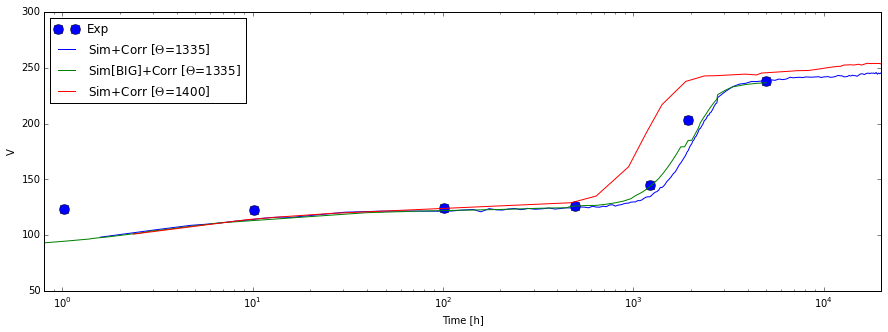

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import *
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 5.0)

PATH = "/home/idopico/Notebooks/PyNotes/data/Vfactor/"

# Linear correlation constants

m = 132
c = 86

ref = loadtxt(PATH + "linear/ref")
sim = loadtxt(PATH + "final/50x50x20")
sim2 = loadtxt(PATH + "50x50x20")
simB = loadtxt(PATH + "final/400x400x20")

plt.plot(ref[:, 0], ref[:, 1], 'bo', ms=10, label='Exp')
plt.plot([ts / 3600 for ts in sim[:, 0]], [v * m + c for v in sim[:, 1]], label='Sim+Corr [$\Theta$=1335]')
plt.plot([ts / 3600 for ts in simB[:, 0]], [v * m + c for v in simB[:, 1]], label='Sim[BIG]+Corr [$\Theta$=1335]')
plt.plot([ts / 3600 for ts in sim2[:, 0]], [v * m + c for v in sim2[:, 1]], label='Sim+Corr [$\Theta$=1400]')

plt.xscale('log')
plt.xlabel('Time [h]')
plt.ylabel('V')
plt.xlim([0.8, 2e4])
plt.legend(loc=2)

### Analytical relation between properties of the nanostructure with mechanical properties of the material

As shown in the introduction there are some expressions capable of relate the evolution of some nanostructure properties, simulated by kMC techniques, with some mechanical properties of the material through the use of rough approximations. In this section we attempt to use this expressions and apply them to the simulations reproducing the Chen et al. experiment.

Then input of the analytical framework are the number density and raidus of the $\alpha'$ precipitates that can be directly obtained from the kMC simulation output. The following graph shows the so far results:

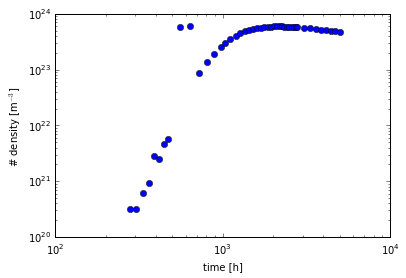

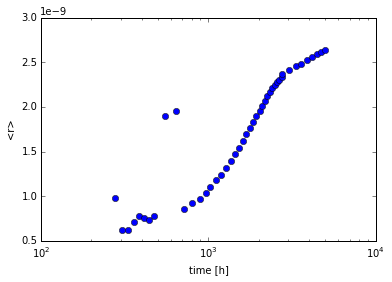

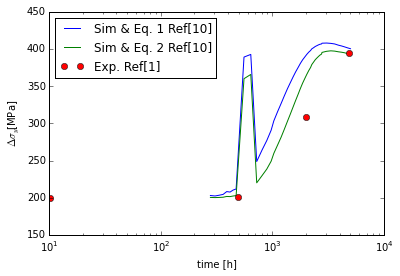

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import *
import sys

# Global Constants
M = 3.06 # Taylor factor Ref[1]
alpha = 0.13 # Strength factor from [0.11-1] depending on barrier type Ref[1]
G = 75.3 * 1e3 # MPa Shear modulus
b = 0.248 * 1e-9 # Burgers vector

"""
    The strength factor, alpha, can vary from 0.11-1 for equation 1 and is 
    taken to be 4/5 for strong obstacles and 1/8 for small dislocation loops
    in equation 2.
    
    Eq.1 and Eq.2 are for weak precipitates and Eq.3 for impenetrable 
    obstacles.
"""

dataPath = "/media/hd/Simulations/Chen/Sep_I_E5_Sf1_Big/clusters5/"

nDen = loadtxt(dataPath + "density.data")
rad = loadtxt(dataPath + "rad.data")
expYS = loadtxt("/home/idopico/Notebooks/PyNotes/img/Vfactor/Chen_2.jpeg.dat")
nDen[:, 0] = [ ts / 3600. for ts in nDen[:, 0]]
rad[:, 0] = [ ts / 3600. for ts in rad[:, 0]]
rad[:, 1] = [ x ** (1 / 3) * 1e-9 for x in rad[:, 1]]

# Analytical Equations
def eq1(nDen, rad):
    alpha = 0.07
    return M * alpha * G * b * sqrt(nDen * 2 * rad) + expYS[0, 1]
def eq2(nDen, rad):
    alpha = 0.21
    return alpha * M * G * b * nDen ** (2 / 3) * rad + expYS[0, 1]


plt.figure(1)
plt.plot(nDen[:, 0], nDen[:, 1], 'bo')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("time [h]")
plt.ylabel("# density [m$^{-3}$]")

plt.figure(2)
plt.plot(rad[:, 0], rad[:, 1], 'bo')
plt.xscale('log')
plt.yscale('linear')
plt.xlabel("time [h]")
plt.ylabel("<r>")

plt.figure(3)
plt.plot(nDen[:, 0], eq1(nDen[:, 1], rad[:, 1]), label="Sim & Eq. 1 Ref[10]")
plt.plot(nDen[:, 0], eq2(nDen[:, 1], rad[:, 1]), label="Sim & Eq. 2 Ref[10]")
plt.plot(expYS[:, 0], expYS[:, 1], 'ro', label="Exp. Ref[1]")
plt.xscale('log')
plt.yscale('linear')
plt.xlabel("time [h]")
plt.ylabel("$\Delta\sigma_{y}$[MPa]")
plt.legend(loc=0)

plt.show()

### V factor and the cell size
Due to the necessity of divide the volume in order to obtain the concentration distribution of the sample, the V factor is strongly dependent on the cell division size. Therefore a correlation between the V factor and a mechancial parameter made for one cell size its in general not valid for other cell size.

To visualice this cell size depence a set of simulations was prepared with a range of cell sizes (0.75nm, 1nm, 1.5nm and 2nm). The conditions of the simulations are exactly the same Fe-15%Cr aged up to 5500h at 475$^\circ$C. 

#### <font style="text-decoration:underline;">Cell size 0.75nm</font>
 <img src="files/img/Vfactor/0.75nm6.2e7s.png" alt="0.75" height="300" width="840"> 
#### <font style="text-decoration:underline;">Cell size 1nm</font>
<img src="files/img/Vfactor/1nm6.2e7s.png" alt="0.75" height="300" width="840"> 
#### <font style="text-decoration:underline;">Cell size 1.5nm</font>
<img src="files/img/Vfactor/1.5nm6.2e7s.png" alt="0.75" height="300" width="840"> 
#### <font style="text-decoration:underline;">Cell size 2nm</font>
<img src="files/img/Vfactor/2nm6.2e7s.png" alt="0.75" height="300" width="840"> 

It is clearly shown that the distributions for cell sizes of 0.75 nm  and 1nm the 'tails' lay over the the binomial distribution leading to a non-zero variation factor, while in the case of 1.5nm and 2nm the two distributions dont see each other leading to a $\sim$0 V. But, **what if we pick the simulation of 0.75nm/1nm and we analyse it with cells of 1.5nm/2nm ?

#### <font style="text-decoration:underline;">Simulated: 0.75nm Analysed: 1.5nm</font>
 <img src="files/img/Vfactor/0.75to1.5nm6.2e7s.png" alt="0.75" height="300" width="840"> 
#### <font style="text-decoration:underline;">Simulated: 1nm Analysed: 2nm</font>
<img src="files/img/Vfactor/1to2nm6.2e7s.png" alt="0.75" height="300" width="840"> 

We can assure that the only difference between V factors is the cell size chosen for **make the histogram** and it is **completely independent** of the cell size chosen for run the simulation.

The difference between the evolution of the V factor with the cell size is shown in the following graph:

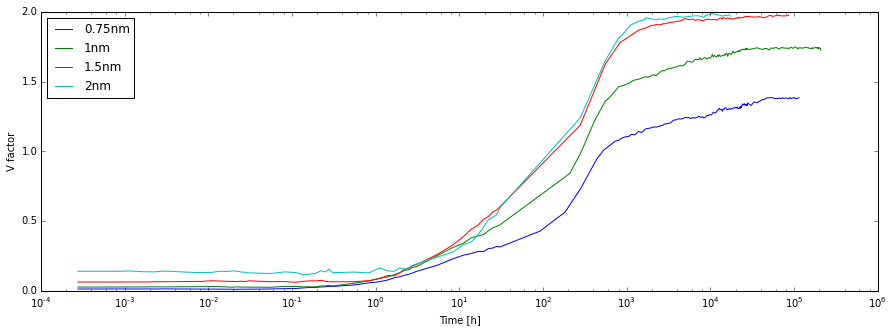

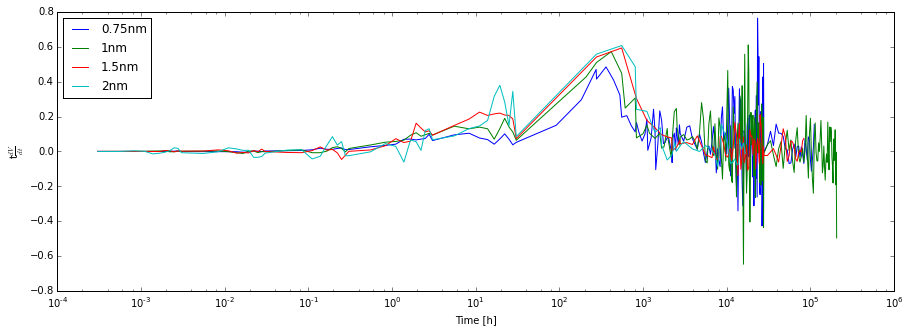

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import *
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 5.0)

PATH = "/home/idopico/Notebooks/PyNotes/data/Vfactor/"

dataFiles = ["0.75nm", "1nm", "1.5nm", "2nm"] #, "100atm"]
theD = {}

for name in dataFiles:    
    theD[name] = loadtxt(PATH + name)    
    der, tder = [], []
    y = theD[name][:, 1]
    x = theD[name][:, 0]
    x2 = []
    for i in range(1, len(y) - 1):        
        der.append((y[i + 1] - y[i - 1]) / (x[i + 1] - x[i - 1]))
        tder.append(x[i] * der[i - 1])
        x2.append(x[i])
    fig1 = plt.figure(1)
    plt.plot([ ts / 3600. for ts in theD[name][:, 0]], theD[name][:, 1], label=name)        
    plt.xscale('log')  
    plt.xlabel('Time [h]')
    plt.ylabel('V factor')
    plt.legend(loc=2)      
    fig2 = plt.figure(2)    
    plt.plot([ ts / 3600. for ts in x2], tder, label=name)    
    plt.xscale('log')  
    plt.xlabel('Time [h]')
    plt.ylabel(r't$\frac{dV}{dt}$')
    plt.legend(loc=2)

### V factor and the simulation domain

In this section a study of different simulation domains and its relation with the *V* factor is presented. A set of simulations with a fixed simulation cell of 1nm and simulation domains of (20x20x20)nm$^3$, (50x50x20)nm$^3$, (100x100x20)nm$^3$, (200x200x20)nm$^3$ and (400x400x20)nm$^3$ has been carried out in the exact same conditions than in the previous section. The objectives of this study are:

1. Show that, once the volume is large enought, the V factor is independent of the domain size.
2. Search the minimum volume capable of reproduce the V factor of a large bulk volume. In other words, search for the inferior limit of convergence of the V factor with the volume.

The results are plot in the following figure:



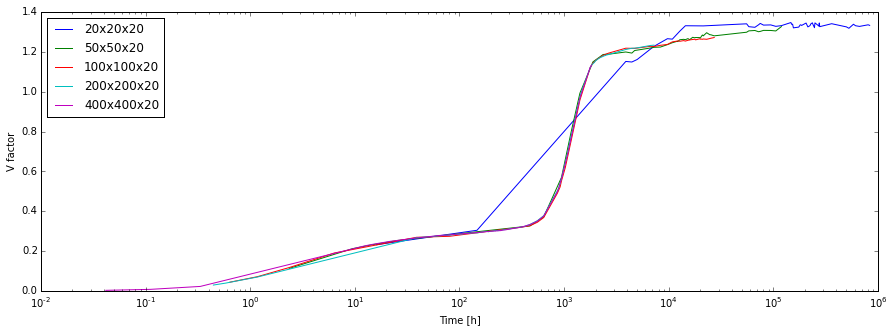

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import *
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 5.0)

PATH = "/home/idopico/Notebooks/PyNotes/data/Vfactor/"

dataFiles = ["20x20x20", "50x50x20", "100x100x20", "200x200x20", "400x400x20"]
theD = {}

for name in dataFiles:    
    theD[name] = loadtxt(PATH + name)    
    plt.plot([ ts / 3600. for ts in theD[name][:, 0]], theD[name][:, 1], label=name)
plt.xscale('log')  
plt.xlabel('Time [h]')
plt.ylabel('V factor')
plt.legend(loc=2)

### Convergence of the Simulations - The free surface

Two set of five simulations each were launch at same inital concentration and temperature. Differences between sets are that one uses periodic boundary conditions and the Martinez et al.[12] time algorithm:

$$t_{Real} = t_{MMonCa}\frac{C_V}{C^{eq}_{V}},$$

and the other uses one free surface. Simulation results are represented in the following graph:

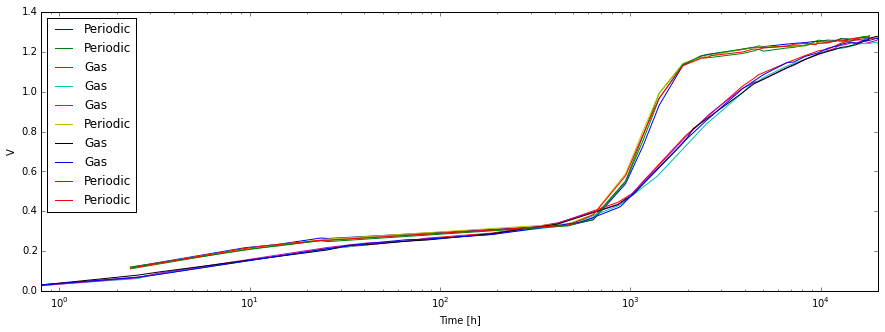

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import *
import pylab
import os
pylab.rcParams['figure.figsize'] = (15.0, 5.0)

PATH = "/home/idopico/Notebooks/PyNotes/data/Vfactor/"

for file in os.listdir(PATH + "convRS"):    
    data = loadtxt(PATH + "convRS/" + file)
    tl = "Gas" if 'G' in file else "Periodic"    
    plt.plot([ts / 3600 for ts in data[:, 0]], data[:, 1], label= tl)
    
plt.xscale('log')
plt.xlabel('Time [h]')
plt.ylabel('V')
plt.xlim([0.8, 2e4])
plt.legend(loc=2)

References
----------

[1] Blavette, D., Grancher, G., & Bostel, A. (1988). Statistical analysis of atom-probe data (I): Derivation of some fine-scale features from frequency distributions for finely dispersed systems. Le Journal de Physique Colloques, 49(C6), C6-433. [doi:10.1051/jphyscol:1988674](http://dx.doi.org/10.1051/jphyscol:1988674)

[2] Danoix, F., & Auger, P. (2000). Atom probe studies of the Fe–Cr system and stainless steels aged at intermediate temperature: a review. Materials Characterization, 44(1), 177-201. [doi:10.1016/S1044-5803(99)00048-0](http://dx.doi.org/10.1016/S1044-5803%2899%2900048-0)

[3] Pareige, C., Novy, S., Saillet, S., & Pareige, P. (2011). Study of phase transformation and mechanical properties evolution of duplex stainless steels after long term thermal ageing (> 20years). Journal of Nuclear Materials, 411(1), 90-96. [doi:10.1016/j.jnucmat.2011.01.036](http://dx.doi.org/10.1016/j.jnucmat.2011.01.036)

[4] Suzudo, T., Nagai, Y., Schwen, D., & Caro, A. (2015). Hardening in thermally-aged Fe–Cr binary alloys: Statistical parameters of atomistic configuration. Acta Materialia, 89, 116-122. [doi:10.1016/j.actamat.2015.02.013](http://dx.doi.org/10.1016/j.actamat.2015.02.013) 

[5] Lucas, G. E. (1993). The evolution of mechanical property change in irradiated austenitic stainless steels. Journal of Nuclear Materials, 206(2), 287-305. [doi:10.1016/0022-3115(93)90129-M](http://dx.doi.org/10.1016/0022-3115%2893%2990129-M)

[6]

[7] R.O. Scattergood, D.J. Bacon (1982). The strengthening effect of voids, Acta Metallurgica, Volume 30, Issue 8,  Pages 1665-1677. [doi:10.1016/0001-6160(82)90188-2](http://dx.doi.org/10.1016/0001-6160%2882%2990188-2)

[8] Haghighat, S. H., Schäublin, R., & Raabe, D. (2014). Atomistic simulation of the a 0< 100> binary junction formation and its unzipping in body-centered cubic iron. Acta Materialia, 64, 24-32.[doi:10.1016/j.actamat.2013.11.037](http://dx.doi.org/10.1016/j.actamat.2013.11.037)
10.1016/j.actamat.2013.11.037

[9] Pavlina, E. J., & Van Tyne, C. J. (2008). Correlation of yield strength and tensile strength with hardness for steels. Journal of Materials Engineering and Performance, 17(6), 888-893. [doi:10.1007/s11665-008-9225-5](http://dx.doi.org/10.1007/s11665-008-9225-5)

[10] Chen, D., Kimura, A., & Han, W. (2014). Correlation of Fe/Cr phase decomposition process and age-hardening in Fe–15Cr ferritic alloys. Journal of Nuclear Materials, 455(1), 436-439. [doi:10.1016/j.jnucmat.2014.07.069](http://dx.doi.org/10.1016/j.jnucmat.2014.07.069)

[11] Dopico, I., Castrillo, P., & Martin-Bragado, I. (2015). Quasi-atomistic modeling of the microstructure evolution in binary alloys and its application to the FeCr case. Acta Materialia, 95, 324-334. [doi:10.1016/j.actamat.2015.05.040](http://dx.doi.org/10.1016/j.actamat.2015.05.040)

[12] Martínez, E., Senninger, O., Fu, C. C., & Soisson, F. (2012). Decomposition kinetics of Fe-Cr solid solutions during thermal aging. Physical Review B, 86(22), 224109. [doi:10.1103/PhysRevB.86.224109](http://dx.doi.org/10.1103/PhysRevB.86.224109)
